## The Tana River annual hydrologic cycle plot (Figure 1) script

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotting

In [2]:
# set plot font to Arial
use_liberation_fonts = True
if use_liberation_fonts:
    plt.rcParams.update({
        'font.family':'sans-serif',
        'font.sans-serif':['Liberation Sans'],
    })

In [3]:
# import flow rate data
data = pd.read_csv('../data/Virtaama_Alaköngäs_20230101_20231231_v2.csv', delimiter=';')

In [4]:
data.columns = ["Aika", "Discharge"]

In [5]:
# set "Aika" (eng. time) as datetime and index
data["Aika"] = pd.to_datetime(data["Aika"], format="mixed", dayfirst=True)
data = data.set_index("Aika")

In [6]:
# check
data

,Discharge
Aika,
2023-01-01,64.83
2023-01-02,64.87
2023-01-03,64.13
2023-01-04,63.62
2023-01-05,63.12
...,...
2023-12-27,368.28
2023-12-28,365.34
2023-12-29,364.73


In [7]:
# import weather data
wdata = pd.read_csv('../data/Sää_UtsjokiNuorgam_20230101-20231231_v2.csv', delimiter=',')

In [8]:
wdata.columns = ['Aika', 'Precipitation', 'Temperature']

In [9]:
# set "Aika" (eng. time) as datetime and index
wdata["Aika"] = pd.to_datetime(wdata["Aika"], format="mixed", dayfirst=True)
wdata = wdata.set_index("Aika")

In [10]:
# check
wdata

,Precipitation,Temperature
Aika,,
2023-01-01,4.9,-3.4
2023-01-02,0.5,-2.3
2023-01-03,0.2,-16.7
2023-01-04,-1.0,-14.7
2023-01-05,-1.0,-12.7
...,...,...
2023-12-27,0.3,-8.3
2023-12-28,-1.0,-20.1
2023-12-29,-1.0,-12.0


In [11]:
wdata['Precipitation'] = wdata['Precipitation'].replace(-1.0,np.NaN)

In [12]:
wdata

,Precipitation,Temperature
Aika,,
2023-01-01,4.9,-3.4
2023-01-02,0.5,-2.3
2023-01-03,0.2,-16.7
2023-01-04,NaN,-14.7
2023-01-05,NaN,-12.7
...,...,...
2023-12-27,0.3,-8.3
2023-12-28,NaN,-20.1
2023-12-29,NaN,-12.0


In [13]:
# create a Boolean mask for the rows to remove
#mask = wdata['Precipitation'] == -1.0

# select all rows except the ones that contain 'Coca Cola'
#wdata = wdata[~mask]

In [14]:
#x = wdata.index

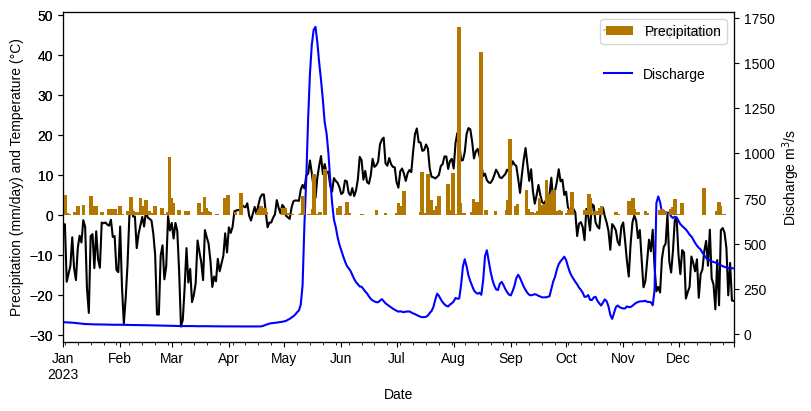

In [18]:
# plot
fig, ax = plotting.init_plot()
wdata.plot(y='Temperature', color='black', ax=ax, legend=True)
#wdata.plot(y='Precipitation', color='#B37700', ax=ax, legend=True)
#wdata['Precipitation'].plot.bar(color='#B37700', ax=ax, legend=True)
#wdata.hist(x='Precipitation', density=True, histtype='step', cumulative=True, legend=True)
ax.get_legend().get_frame().set_edgecolor('none')

ax.set_xlabel("Date")
ax.set_ylabel('Precipitation (mm/day) and Temperature (°C)')

ax2 = ax.twinx()
ax2.set_ylabel("Discharge m$^3$/s")
data.plot(color='#0000FF', ax=ax2, legend=True)

ax3 = ax.twiny()
wdata['Precipitation'].plot.bar(color='#B37700', ax=ax3, width=2, legend=True)
ax3.xaxis.set_visible(False)

leg2 = ax2.get_legend()
leg2.set_bbox_to_anchor((0.977, 0.871))
leg2.get_frame().set_edgecolor('none')

In [12]:
# save as png
#plotting.save_plot(fig=fig, name='annual_weather', dpi=600)